In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [104]:
ball_df = pd.read_csv('Ball_by_Ball.csv')
player_df = pd.read_csv('Player.csv')
match_df = pd.read_csv('Match.csv')
season_df = pd.read_csv('Season.csv')
team_df = pd.read_csv('Team.csv')

In [105]:
ball_df.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,


In [106]:
ball_df.dtypes

Match_Id                     int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored              object
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [107]:
ball_df['Batsman_Scored'] = pd.to_numeric(ball_df['Batsman_Scored'], errors='coerce').fillna(0)

### Total Matches Played vs Matches Won by Each Team

In [108]:
# Calculate Matches Won
matches_won = match_df.groupby('Match_Winner_Id').size().reset_index(name='Matches_Won').rename(columns={'Match_Winner_Id': 'Team_Id'})

In [109]:
matches_won

,Team_Id,Matches_Won
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [110]:
# Calculate Total Matches Played
matches_played_home = match_df.groupby('Team_Name_Id').size().reset_index(name='Played_Home').rename(columns={'Team_Name_Id': 'Team_Id'})
matches_played_away = match_df.groupby('Opponent_Team_Id').size().reset_index(name='Played_Away').rename(columns={'Opponent_Team_Id': 'Team_Id'})

In [111]:
matches_played_home

,Team_Id,Played_Home
0,1,62
1,2,78
2,3,74
3,4,65
4,5,52
5,6,69
6,7,62
7,8,39
8,9,7
9,10,23


In [112]:
matches_played_away

,Team_Id,Played_Away
0,1,70
1,2,61
2,3,57
3,4,69
4,5,66
5,6,64
6,7,78
7,8,36
8,9,7
9,10,23


In [113]:
# Merge and calculate total played
matches_stats = pd.merge(matches_played_home, matches_played_away, on='Team_Id', how='outer').fillna(0)
matches_stats['Total_Matches_Played'] = matches_stats['Played_Home'] + matches_stats['Played_Away']
matches_stats = matches_stats[['Team_Id', 'Total_Matches_Played']]
matches_stats

,Team_Id,Total_Matches_Played
0,1,132
1,2,139
2,3,131
3,4,134
4,5,118
5,6,133
6,7,140
7,8,75
8,9,14
9,10,46


In [114]:
# Merge with Matches Won and Team Names
matches_stats = pd.merge(matches_stats, matches_won, on='Team_Id', how='left').fillna(0)
matches_stats = pd.merge(matches_stats, team_df[['Team_Id', 'Team_Short_Code']], on='Team_Id', how='left')
matches_stats = matches_stats.sort_values(by='Total_Matches_Played', ascending=False)
matches_stats

,Team_Id,Total_Matches_Played,Matches_Won,Team_Short_Code
6,7,140,80,MI
1,2,139,70,RCB
3,4,134,63,KXIP
5,6,133,56,DD
0,1,132,68,KKR
2,3,131,79,CSK
4,5,118,63,RR
7,8,75,29,DC
10,11,62,34,SRH
9,10,46,12,PW


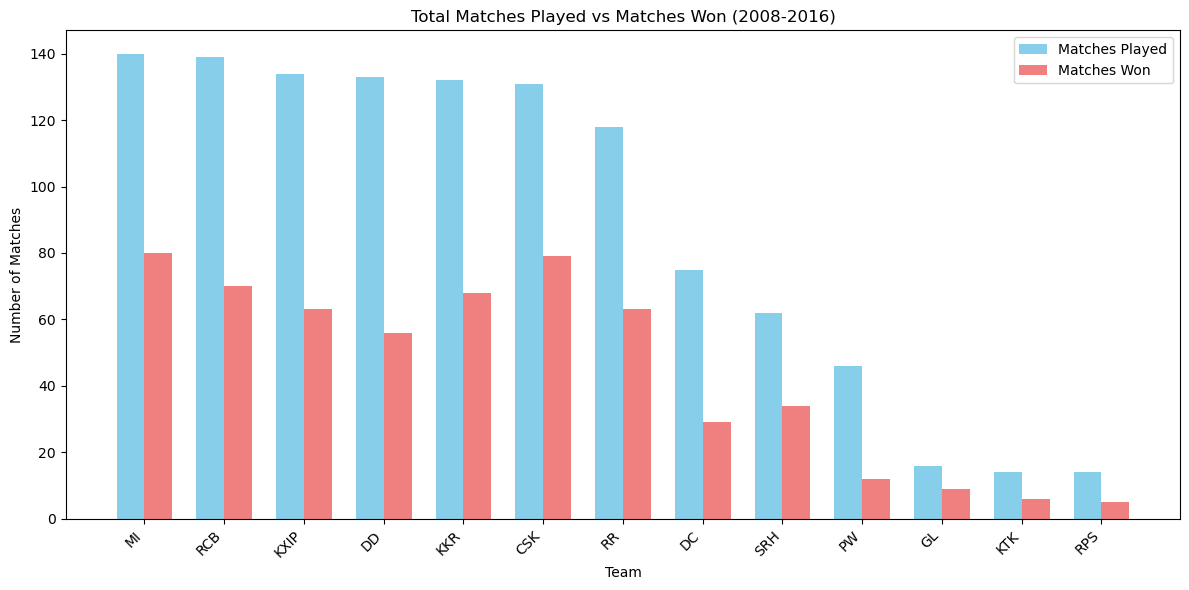

In [115]:
# Plotting the combined bar graph
fig, ax1 = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(matches_stats))

ax1.bar(index, matches_stats['Total_Matches_Played'], bar_width, label='Matches Played', color='skyblue')
ax1.bar(index + bar_width, matches_stats['Matches_Won'], bar_width, label='Matches Won', color='lightcoral')

ax1.set_xlabel('Team')
ax1.set_ylabel('Number of Matches')
ax1.set_title('Total Matches Played vs Matches Won (2008-2016)')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(matches_stats['Team_Short_Code'], rotation=45, ha='right')
ax1.legend()
plt.tight_layout()
plt.savefig('combined_matches_played_won.png')
plt.show()

### Winning Team of Each Season

In [116]:
# Merge Match and Season data
season_match_df = pd.merge(match_df, season_df[['Season_Id', 'Season_Year']], on='Season_Id', how='left')
season_match_df.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,Season_Year
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India,2008.0
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India,2008.0
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India,2008.0
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India,2008.0
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India,2008.0


In [117]:
# Convert Match_Date to datetime
season_match_df['Match_Date'] = pd.to_datetime(season_match_df['Match_Date'], format='%d-%b-%y')
season_match_df

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,Season_Year
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India,2008.0
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India,2008.0
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India,2008.0
3,335990,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India,2008.0
4,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,2016-05-22,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India,2016.0
573,981018,2016-05-24,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India,2016.0
574,981020,2016-05-25,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India,2016.0
575,981022,2016-05-27,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India,2016.0


In [118]:
# Sort by Season Year and then Match Date (final match is the last one in the season)
season_match_df_sorted = season_match_df.sort_values(by=['Season_Year', 'Match_Date'], ascending=[True, True])
season_match_df_sorted

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,Season_Year
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India,2008.0
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India,2008.0
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India,2008.0
3,335990,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India,2008.0
4,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,2016-05-22,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India,2016.0
573,981018,2016-05-24,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India,2016.0
574,981020,2016-05-25,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India,2016.0
575,981022,2016-05-27,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India,2016.0


In [119]:
# Keep the last match for each season
final_matches = season_match_df_sorted.drop_duplicates(subset=['Season_Id'], keep='last')
final_matches

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,Season_Year
57,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,0,by wickets,3.0,5.0,31.0,474,477,Mumbai,India,2008.0
114,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,0,by runs,6.0,8.0,124.0,477,490,Johannesburg,South Africa,2009.0
174,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,0,by runs,22.0,3.0,21.0,477,490,Mumbai,India,2010.0
247,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by runs,58.0,3.0,185.0,470,490,Chennai,India,2011.0
321,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,0,by wickets,5.0,1.0,214.0,474,490,Chennai,India,2012.0
397,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,0,by runs,23.0,7.0,221.0,482,490,Kolkata,India,2013.0
457,734054,2014-06-01,1,4,7,M Chinnaswamy Stadium,1,field,0,1,0,by wickets,3.0,1.0,96.0,482,497,Bangalore,India,2014.0
516,829828,2015-05-24,7,3,8,Eden Gardens,3,field,0,1,0,by runs,41.0,7.0,57.0,482,501,Kolkata,India,2015.0
576,981024,2016-05-29,2,11,9,M Chinnaswamy Stadium,11,bat,0,1,0,by runs,8.0,11.0,385.0,482,497,Bangalore,India,2016.0


In [120]:
# Merge with Team data to get the winner's name
season_winners = pd.merge(final_matches, team_df[['Team_Id', 'Team_Name']],
                         left_on='Match_Winner_Id', right_on='Team_Id', how='left')

In [121]:
season_winners

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,...,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country,Season_Year,Team_Id,Team_Name
0,336045,2008-06-01,3,5,1,Dr DY Patil Sports Academy,5,field,0,1,...,3.0,5.0,31.0,474,477,Mumbai,India,2008.0,5,Rajasthan Royals
1,392244,2009-05-24,2,8,2,New Wanderers Stadium,2,field,0,1,...,6.0,8.0,124.0,477,490,Johannesburg,South Africa,2009.0,8,Deccan Chargers
2,419170,2010-04-25,3,7,3,Dr DY Patil Sports Academy,3,bat,0,1,...,22.0,3.0,21.0,477,490,Mumbai,India,2010.0,3,Chennai Super Kings
3,501276,2011-05-28,3,2,4,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,...,58.0,3.0,185.0,470,490,Chennai,India,2011.0,3,Chennai Super Kings
4,548386,2012-05-27,1,3,5,"MA Chidambaram Stadium, Chepauk",3,bat,0,1,...,5.0,1.0,214.0,474,490,Chennai,India,2012.0,1,Kolkata Knight Riders
5,598078,2013-05-26,3,7,6,Eden Gardens,7,bat,0,1,...,23.0,7.0,221.0,482,490,Kolkata,India,2013.0,7,Mumbai Indians
6,734054,2014-06-01,1,4,7,M Chinnaswamy Stadium,1,field,0,1,...,3.0,1.0,96.0,482,497,Bangalore,India,2014.0,1,Kolkata Knight Riders
7,829828,2015-05-24,7,3,8,Eden Gardens,3,field,0,1,...,41.0,7.0,57.0,482,501,Kolkata,India,2015.0,7,Mumbai Indians
8,981024,2016-05-29,2,11,9,M Chinnaswamy Stadium,11,bat,0,1,...,8.0,11.0,385.0,482,497,Bangalore,India,2016.0,11,Sunrisers Hyderabad


In [122]:
season_winners_table = season_winners[['Season_Year', 'Team_Name', 'Match_Date']].rename(columns={'Team_Name': 'Season_Winner_Team'})
season_winners_table

,Season_Year,Season_Winner_Team,Match_Date
0,2008.0,Rajasthan Royals,2008-06-01
1,2009.0,Deccan Chargers,2009-05-24
2,2010.0,Chennai Super Kings,2010-04-25
3,2011.0,Chennai Super Kings,2011-05-28
4,2012.0,Kolkata Knight Riders,2012-05-27
5,2013.0,Mumbai Indians,2013-05-26
6,2014.0,Kolkata Knight Riders,2014-06-01
7,2015.0,Mumbai Indians,2015-05-24
8,2016.0,Sunrisers Hyderabad,2016-05-29


In [123]:
season_winners_table.to_csv('season_winners.csv', index=False)

### Masking Techniques: Top Batsmen, Orange Cap Holders, Player 'X' vs Teams

In [124]:
# Top 5 Batsmen with Most Runs (All-Time)
batsman_runs = ball_df.groupby('Striker_Id')['Batsman_Scored'].sum().reset_index(name='Total_Runs')
top_runs = pd.merge(batsman_runs, player_df[['Player_Id', 'Player_Name']],
                    left_on='Striker_Id', right_on='Player_Id', how='left')
top_runs

,Striker_Id,Total_Runs,Player_Id,Player_Name
0,1,1349.0,1,SC Ganguly
1,2,2435.0,2,BB McCullum
2,3,91.0,3,RT Ponting
3,4,1322.0,4,DJ Hussey
4,5,64.0,5,Mohammad Hafeez
...,...,...,...,...
429,430,0.0,430,A Zampa
430,431,104.0,431,N Rana
431,432,0.0,432,S Kaushik
432,433,24.0,433,ER Dwivedi


In [125]:
top_5_runs = top_runs.sort_values(by='Total_Runs', ascending=False).head(5)[['Player_Name', 'Total_Runs']]
top_5_runs.to_csv('top_5_runs.csv', index=False)
top_5_runs

,Player_Name,Total_Runs
20,SK Raina,4106.0
7,V Kohli,4105.0
56,RG Sharma,3874.0
39,G Gambhir,3634.0
161,CH Gayle,3447.0


In [126]:
# Top 5 Batsmen with Most Sixes (All-Time)
sixes_df = ball_df[ball_df['Batsman_Scored'] == 6] # Masking: filter for sixes
batsman_sixes = sixes_df.groupby('Striker_Id').size().reset_index(name='Total_Sixes')
batsman_sixes

,Striker_Id,Total_Sixes
0,1,42
1,2,106
2,3,2
3,4,60
4,5,2
...,...,...
276,422,1
277,426,3
278,427,4
279,431,8


In [127]:
top_sixes = pd.merge(batsman_sixes, player_df[['Player_Id', 'Player_Name']],
                     left_on='Striker_Id', right_on='Player_Id', how='left')
top_sixes

,Striker_Id,Total_Sixes,Player_Id,Player_Name
0,1,42,1,SC Ganguly
1,2,106,2,BB McCullum
2,3,2,3,RT Ponting
3,4,60,4,DJ Hussey
4,5,2,5,Mohammad Hafeez
...,...,...,...,...
276,422,1,422,KC Cariappa
277,426,3,426,UT Khawaja
278,427,4,427,HM Amla
279,431,8,431,N Rana


In [128]:
top_5_sixes = top_sixes.sort_values(by='Total_Sixes', ascending=False).head(5)[['Player_Name', 'Total_Sixes']]
top_5_sixes.to_csv('top_5_sixes.csv', index=False)
top_5_sixes

,Player_Name,Total_Sixes
121,CH Gayle,252
51,RG Sharma,164
18,SK Raina,161
7,V Kohli,148
28,YK Pathan,143


In [129]:
# List of Orange Cap Holders
orange_cap_holders = pd.merge(season_df[['Season_Year', 'Orange_Cap_Id']],
                             player_df[['Player_Id', 'Player_Name']],
                             left_on='Orange_Cap_Id', right_on='Player_Id', how='left')

In [130]:
orange_cap_holders = orange_cap_holders[['Season_Year', 'Player_Name']].rename(columns={'Player_Name': 'Orange_Cap_Holder'})
orange_cap_holders

,Season_Year,Orange_Cap_Holder
0,2008.0,SE Marsh
1,2009.0,ML Hayden
2,2010.0,SR Tendulkar
3,2011.0,CH Gayle
4,2012.0,CH Gayle
5,2013.0,MEK Hussey
6,2014.0,RV Uthappa
7,2015.0,DA Warner
8,2016.0,V Kohli
9,NaN,NaN


In [131]:
orange_cap_holders.to_csv('orange_cap_holders.csv', index=False)

In [132]:
# Player 'X' scored the most against which teams (Player 'X' = the overall top run-scorer)
player_x_id = top_runs.iloc[0]['Striker_Id']
player_x_name = top_runs.iloc[0]['Player_Name']

player_x_runs = ball_df[ball_df['Striker_Id'] == player_x_id].copy()
player_x_runs_vs_teams = player_x_runs.groupby('Team_Bowling_Id')['Batsman_Scored'].sum().reset_index(name='Runs_Scored')

player_x_runs_vs_teams = pd.merge(player_x_runs_vs_teams, team_df[['Team_Id', 'Team_Name']],
                                 left_on='Team_Bowling_Id', right_on='Team_Id', how='left')

In [133]:
player_x_runs_vs_teams_table = player_x_runs_vs_teams.sort_values(by='Runs_Scored', ascending=False)[['Team_Name', 'Runs_Scored']].rename(columns={'Team_Name': 'Opponent_Team'})
player_x_runs_vs_teams_table

,Opponent_Team,Runs_Scored
7,Deccan Chargers,327.0
4,Rajasthan Royals,253.0
3,Kings XI Punjab,235.0
5,Delhi Daredevils,154.0
6,Mumbai Indians,111.0
1,Royal Challengers Bangalore,97.0
0,Kolkata Knight Riders,93.0
2,Chennai Super Kings,79.0


In [134]:
player_x_runs_vs_teams_table.to_csv('player_x_runs_vs_teams.csv', index=False)

### Most Destructive Death Over Batsman

In [135]:
death_overs_df = ball_df[ball_df['Over_Id'] >= 16].copy()
death_overs_runs = death_overs_df.groupby('Striker_Id')['Batsman_Scored'].sum().reset_index(name='Death_Overs_Runs')
death_overs_runs

,Striker_Id,Death_Overs_Runs
0,1,190.0
1,2,181.0
2,4,410.0
3,5,10.0
4,6,200.0
...,...,...
385,430,0.0
386,431,14.0
387,432,0.0
388,433,19.0


In [136]:
# Total Balls Faced: exclude wides, noballs, and other non-ball extras for SR calculation
balls_faced_death = death_overs_df[~death_overs_df['Extra_Type'].isin(['wides', 'noballs', 'byes', 'legbyes', 'penalty'])]
balls_faced_count = balls_faced_death.groupby('Striker_Id').size().reset_index(name='Death_Overs_Balls')
death_overs_stats = pd.merge(death_overs_runs, balls_faced_count, on='Striker_Id', how='inner')
death_overs_stats

,Striker_Id,Death_Overs_Runs,Death_Overs_Balls
0,1,190.0,101
1,2,181.0,94
2,4,410.0,223
3,5,10.0,9
4,6,200.0,118
...,...,...,...
384,430,0.0,1
385,431,14.0,7
386,432,0.0,1
387,433,19.0,8


In [137]:
# Filter for batsmen with a minimum number of balls faced
MIN_BALLS = 50
death_overs_stats = death_overs_stats[death_overs_stats['Death_Overs_Balls'] >= MIN_BALLS]
death_overs_stats

,Striker_Id,Death_Overs_Runs,Death_Overs_Balls
0,1,190.0,101
1,2,181.0,94
2,4,410.0,223
4,6,200.0,118
5,8,970.0,499
...,...,...,...
351,394,101.0,67
357,400,112.0,59
358,401,104.0,65
359,402,150.0,74


In [138]:
# Calculate Strike Rate
death_overs_stats['Strike_Rate'] = (death_overs_stats['Death_Overs_Runs']*100 / death_overs_stats['Death_Overs_Balls']).round(2)
death_overs_stats

,Striker_Id,Death_Overs_Runs,Death_Overs_Balls,Strike_Rate
0,1,190.0,101,188.12
1,2,181.0,94,192.55
2,4,410.0,223,183.86
4,6,200.0,118,169.49
5,8,970.0,499,194.39
...,...,...,...,...
351,394,101.0,67,150.75
357,400,112.0,59,189.83
358,401,104.0,65,160.00
359,402,150.0,74,202.70


In [145]:
# Merge with Player Name
destructive_batsmen = pd.merge(death_overs_stats, player_df[['Player_Id', 'Player_Name']],
                               left_on='Striker_Id', right_on='Player_Id', how='left')

most_destructive_batsmen_table = destructive_batsmen.sort_values(by='Strike_Rate', ascending=False).head(10)[['Player_Name', 'Death_Overs_Runs', 'Death_Overs_Balls', 'Strike_Rate']]
most_destructive_batsmen_table['Strike_Rate'] = most_destructive_batsmen_table['Strike_Rate'].round(2)
most_destructive_batsmen_table

,Player_Name,Death_Overs_Runs,Death_Overs_Balls,Strike_Rate
144,JC Buttler,123.0,55,223.64
59,AB de Villiers,1144.0,517,221.28
71,CH Gayle,412.0,188,219.15
122,DA Miller,639.0,314,203.50
143,SN Khan,150.0,74,202.70
19,SR Watson,335.0,170,197.06
80,DA Warner,362.0,185,195.68
4,V Kohli,970.0,499,194.39
11,MEK Hussey,261.0,135,193.33
1,BB McCullum,181.0,94,192.55


In [146]:
most_destructive_batsmen_table.to_csv('most_destructive_batsmen.csv', index=False)

### Pivot Table: Overs (1-20) vs Sixes Scored by Each Team

In [140]:
sixes_per_over = ball_df[ball_df['Batsman_Scored'] == 6].copy()

In [148]:
# Merge with Team_Batting_Id to get the team short code
sixes_per_over = pd.merge(sixes_per_over, team_df[['Team_Id', 'Team_Short_Code']],
                          left_on='Team_Batting_Id', right_on='Team_Id', how='left')

In [151]:
# Create Pivot Table
sixes_pivot = sixes_per_over.pivot_table(index='Team_Short_Code',
                                          columns='Over_Id',
                                          values='Batsman_Scored',
                                          aggfunc='count',
                                          fill_value=0)

In [150]:
# Sort by total sixes for better view
sixes_pivot['Total_Sixes'] = sixes_pivot.sum(axis=1)
sixes_pivot_table = sixes_pivot.sort_values(by='Total_Sixes', ascending=False).drop(columns=['Total_Sixes'])
sixes_pivot_table

Over_Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Team_Short_Code,,,,,,,,,,,,,,,,,,,,
RCB,19,24,36,39,37,28,15,29,42,34,45,34,48,47,51,68,54,76,68,64
MI,7,15,19,21,40,42,14,21,31,19,29,43,44,43,48,55,55,75,63,77
CSK,5,17,37,34,42,43,22,25,23,23,36,36,35,45,43,47,51,58,54,68
KXIP,10,17,24,34,27,34,18,30,29,27,33,34,44,34,40,47,37,53,49,53
DD,14,17,28,35,24,25,18,23,27,21,27,29,33,32,25,40,44,36,53,46
KKR,7,10,21,29,22,27,20,17,21,19,30,27,38,27,37,46,52,49,41,29
RR,12,7,13,21,22,24,15,24,20,26,30,33,39,38,34,36,45,34,37,26
DC,3,21,11,17,27,22,11,13,17,14,15,26,23,22,20,21,38,37,23,19
SRH,3,10,8,6,14,10,7,15,11,8,8,9,14,15,28,21,15,32,37,23


In [152]:
sixes_pivot_table.to_csv('sixes_per_over_pivot.csv')

In [153]:
# --- Display Results ---
print(f"Player X (Top Run Scorer) is: {player_x_name}")
print("\nResults are saved to the following CSV files:")
print("- season_winners.csv")
print("- top_5_runs.csv")
print("- top_5_sixes.csv")
print("- orange_cap_holders.csv")
print("- player_x_runs_vs_teams.csv")
print("- most_destructive_batsmen.csv")
print("- sixes_per_over_pivot.csv")

Player X (Top Run Scorer) is: SC Ganguly

Results are saved to the following CSV files:
- season_winners.csv
- top_5_runs.csv
- top_5_sixes.csv
- orange_cap_holders.csv
- player_x_runs_vs_teams.csv
- most_destructive_batsmen.csv
- sixes_per_over_pivot.csv
